In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
!pip install ucimlrepo

# 1.	Скачать или импортировать в notebook датасет Wine, после чего отобразить первые и последние 5 строк датасета

In [2]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
wine = fetch_ucirepo(id=109)

# data (as pandas dataframes)
Wine = wine.data.features
y = wine.data.targets

# metadata
print(wine.metadata)

# variable information
print(wine.variables)


{'uci_id': 109, 'name': 'Wine', 'repository_url': 'https://archive.ics.uci.edu/dataset/109/wine', 'data_url': 'https://archive.ics.uci.edu/static/public/109/data.csv', 'abstract': 'Using chemical analysis to determine the origin of wines', 'area': 'Physics and Chemistry', 'tasks': ['Classification'], 'characteristics': ['Tabular'], 'num_instances': 178, 'num_features': 13, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1992, 'last_updated': 'Mon Aug 28 2023', 'dataset_doi': '10.24432/C5PC7J', 'creators': ['Stefan Aeberhard', 'M. Forina'], 'intro_paper': {'title': 'Comparative analysis of statistical pattern recognition methods in high dimensional settings', 'authors': 'S. Aeberhard, D. Coomans, O. Vel', 'published_in': 'Pattern Recognition', 'year': 1994, 'url': 'https://www.semanticscholar.org/paper/83dc3e4030d7b9fbdbb4bde03ce12ab70ca10528', 'do

In [3]:
Wine.head(5)

,Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,0D280_0D315_of_diluted_wines,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


0. Спирт
1. Яблочная кислота
2. Зола
3. Щелочность_золы
4. Магний
5. Всего фенолов
6. Флаваноиды
7. Нефлаваноидные_фенолы
8. Проантоцианы
9. Интенсивность цвета
10. Оттенок
11. Разбавленные вина
12. Пролин



In [4]:
Wine.tail(5)

,Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,0D280_0D315_of_diluted_wines,Proline
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.7,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.3,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.2,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.3,0.60,1.62,840
177,14.13,4.10,2.74,24.5,96,2.05,0.76,0.56,1.35,9.2,0.61,1.60,560


# 2.	Необходимо рассмотреть данные и провести анализ (количество семплов, типы данных в ячейках, распределение, корреляция…). Желательно прийти к какому-то выводу после рассмотрения

In [5]:
print(Wine.info())
print(Wine.describe())
correlation = Wine.corr()
print(correlation)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Alcohol                       178 non-null    float64
 1   Malicacid                     178 non-null    float64
 2   Ash                           178 non-null    float64
 3   Alcalinity_of_ash             178 non-null    float64
 4   Magnesium                     178 non-null    int64  
 5   Total_phenols                 178 non-null    float64
 6   Flavanoids                    178 non-null    float64
 7   Nonflavanoid_phenols          178 non-null    float64
 8   Proanthocyanins               178 non-null    float64
 9   Color_intensity               178 non-null    float64
 10  Hue                           178 non-null    float64
 11  0D280_0D315_of_diluted_wines  178 non-null    float64
 12  Proline                       178 non-null    int64  
dtypes: fl

На основе полученных данных можно сделать следующие выводы. Датасет состоит из 178 ненулевых семплов, 13 столбцов (характеристик вина), данные всех столбцов за исключением 4 и 12 (магний и пролине) относятся к числовым данным с плавающими точками, а данные столбцов 4 и 12 - к целочисленным.

---


Также были рассчитаны средние значения показателей. Например, среднее значение содержания магния в винах 99.741573, флаваноидов 2.02927, а средний показатель оттенка 0.957449.  


---
Относительно распределения, можно сделать следующие выыводы. Минимальное значение содержания спирта в вине из представленных семплов составляет 11.03, а максимальное 14.83. При этом 25% данных по этому показателю составляют 12.3625 и ниже, 50% - 13.05 и ниже, а 75% - 13.6775. Минимальное значение проантоцианов составляет 0.41, а макисмальное - 3.58. При этом 25% данных принимают значение 1.25 и ниже, 50% - 1.555 и ниже, 75% - 1,95 и ниже.


---
В корреляционном анализе можно отметить прямую сильную связь 0.864564 между Flavanoids и Total_phenols. Скорее всего, такая связь была вызвана тем, что Flavanoids относится к фенольным соединениям. Следовательно, при увеличении содержания Flavanoids в вине, увеличивается и общее количество фенолов. Самая слабая связь наблюдается между Proanthocyanins и Ash и составляет 0.009652. Это значит, что данные характеристики влияют друг на друга в меньшей степени.



# 3. Произвести визуализации пункта 2, а также провести анализ с помощью библиотек matplotlib, seaborn

<Axes: >

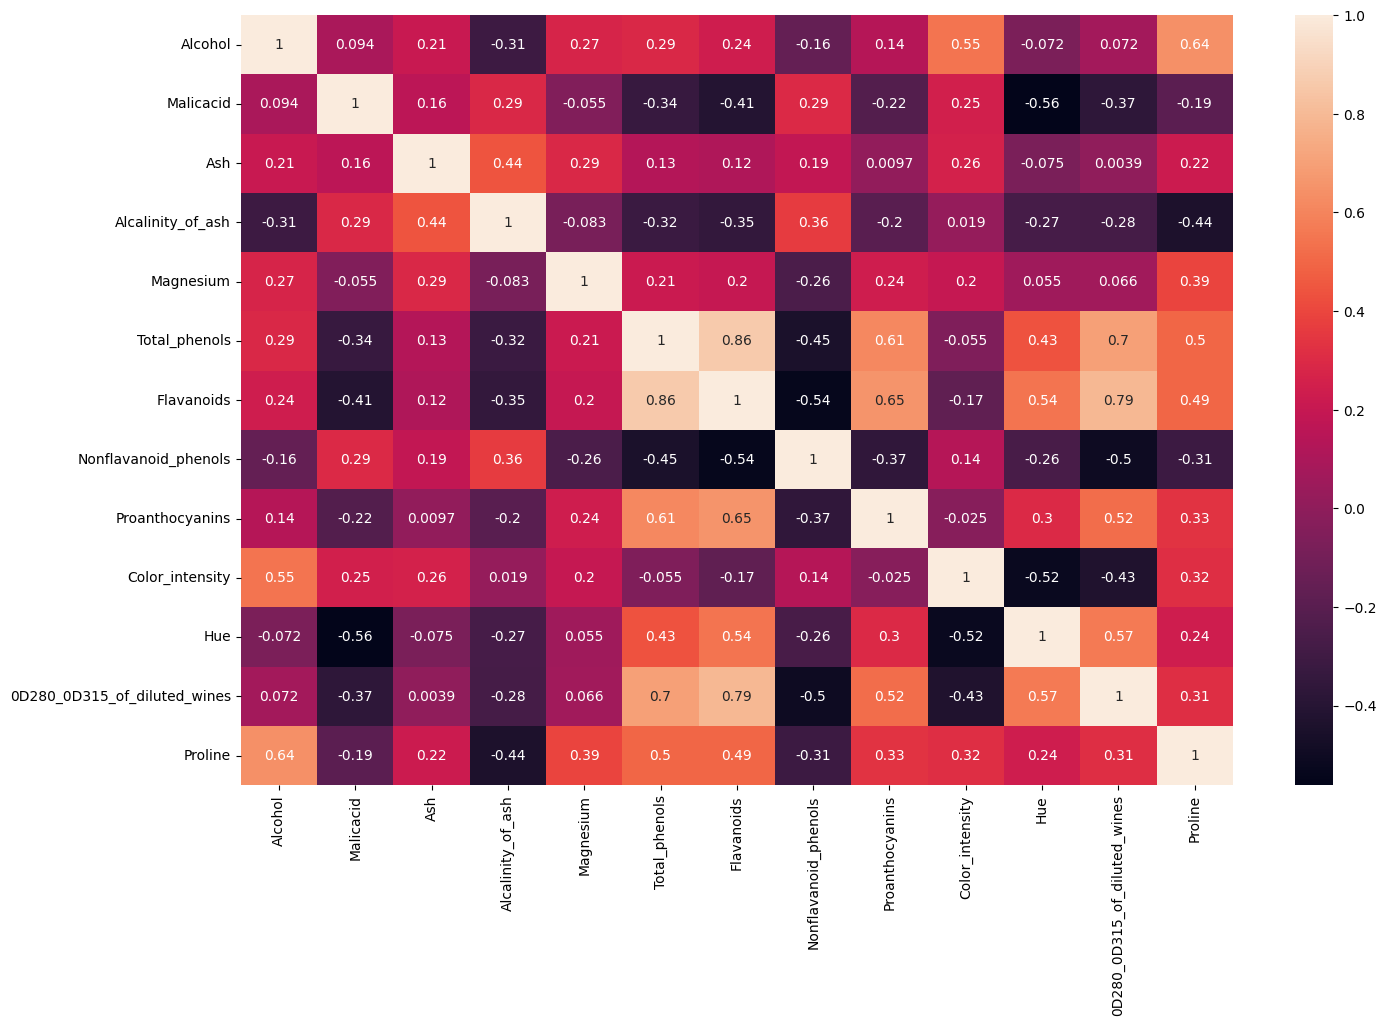

In [6]:
plt.figure(figsize=(16, 10))
sns.heatmap(Wine.corr(), annot=True)

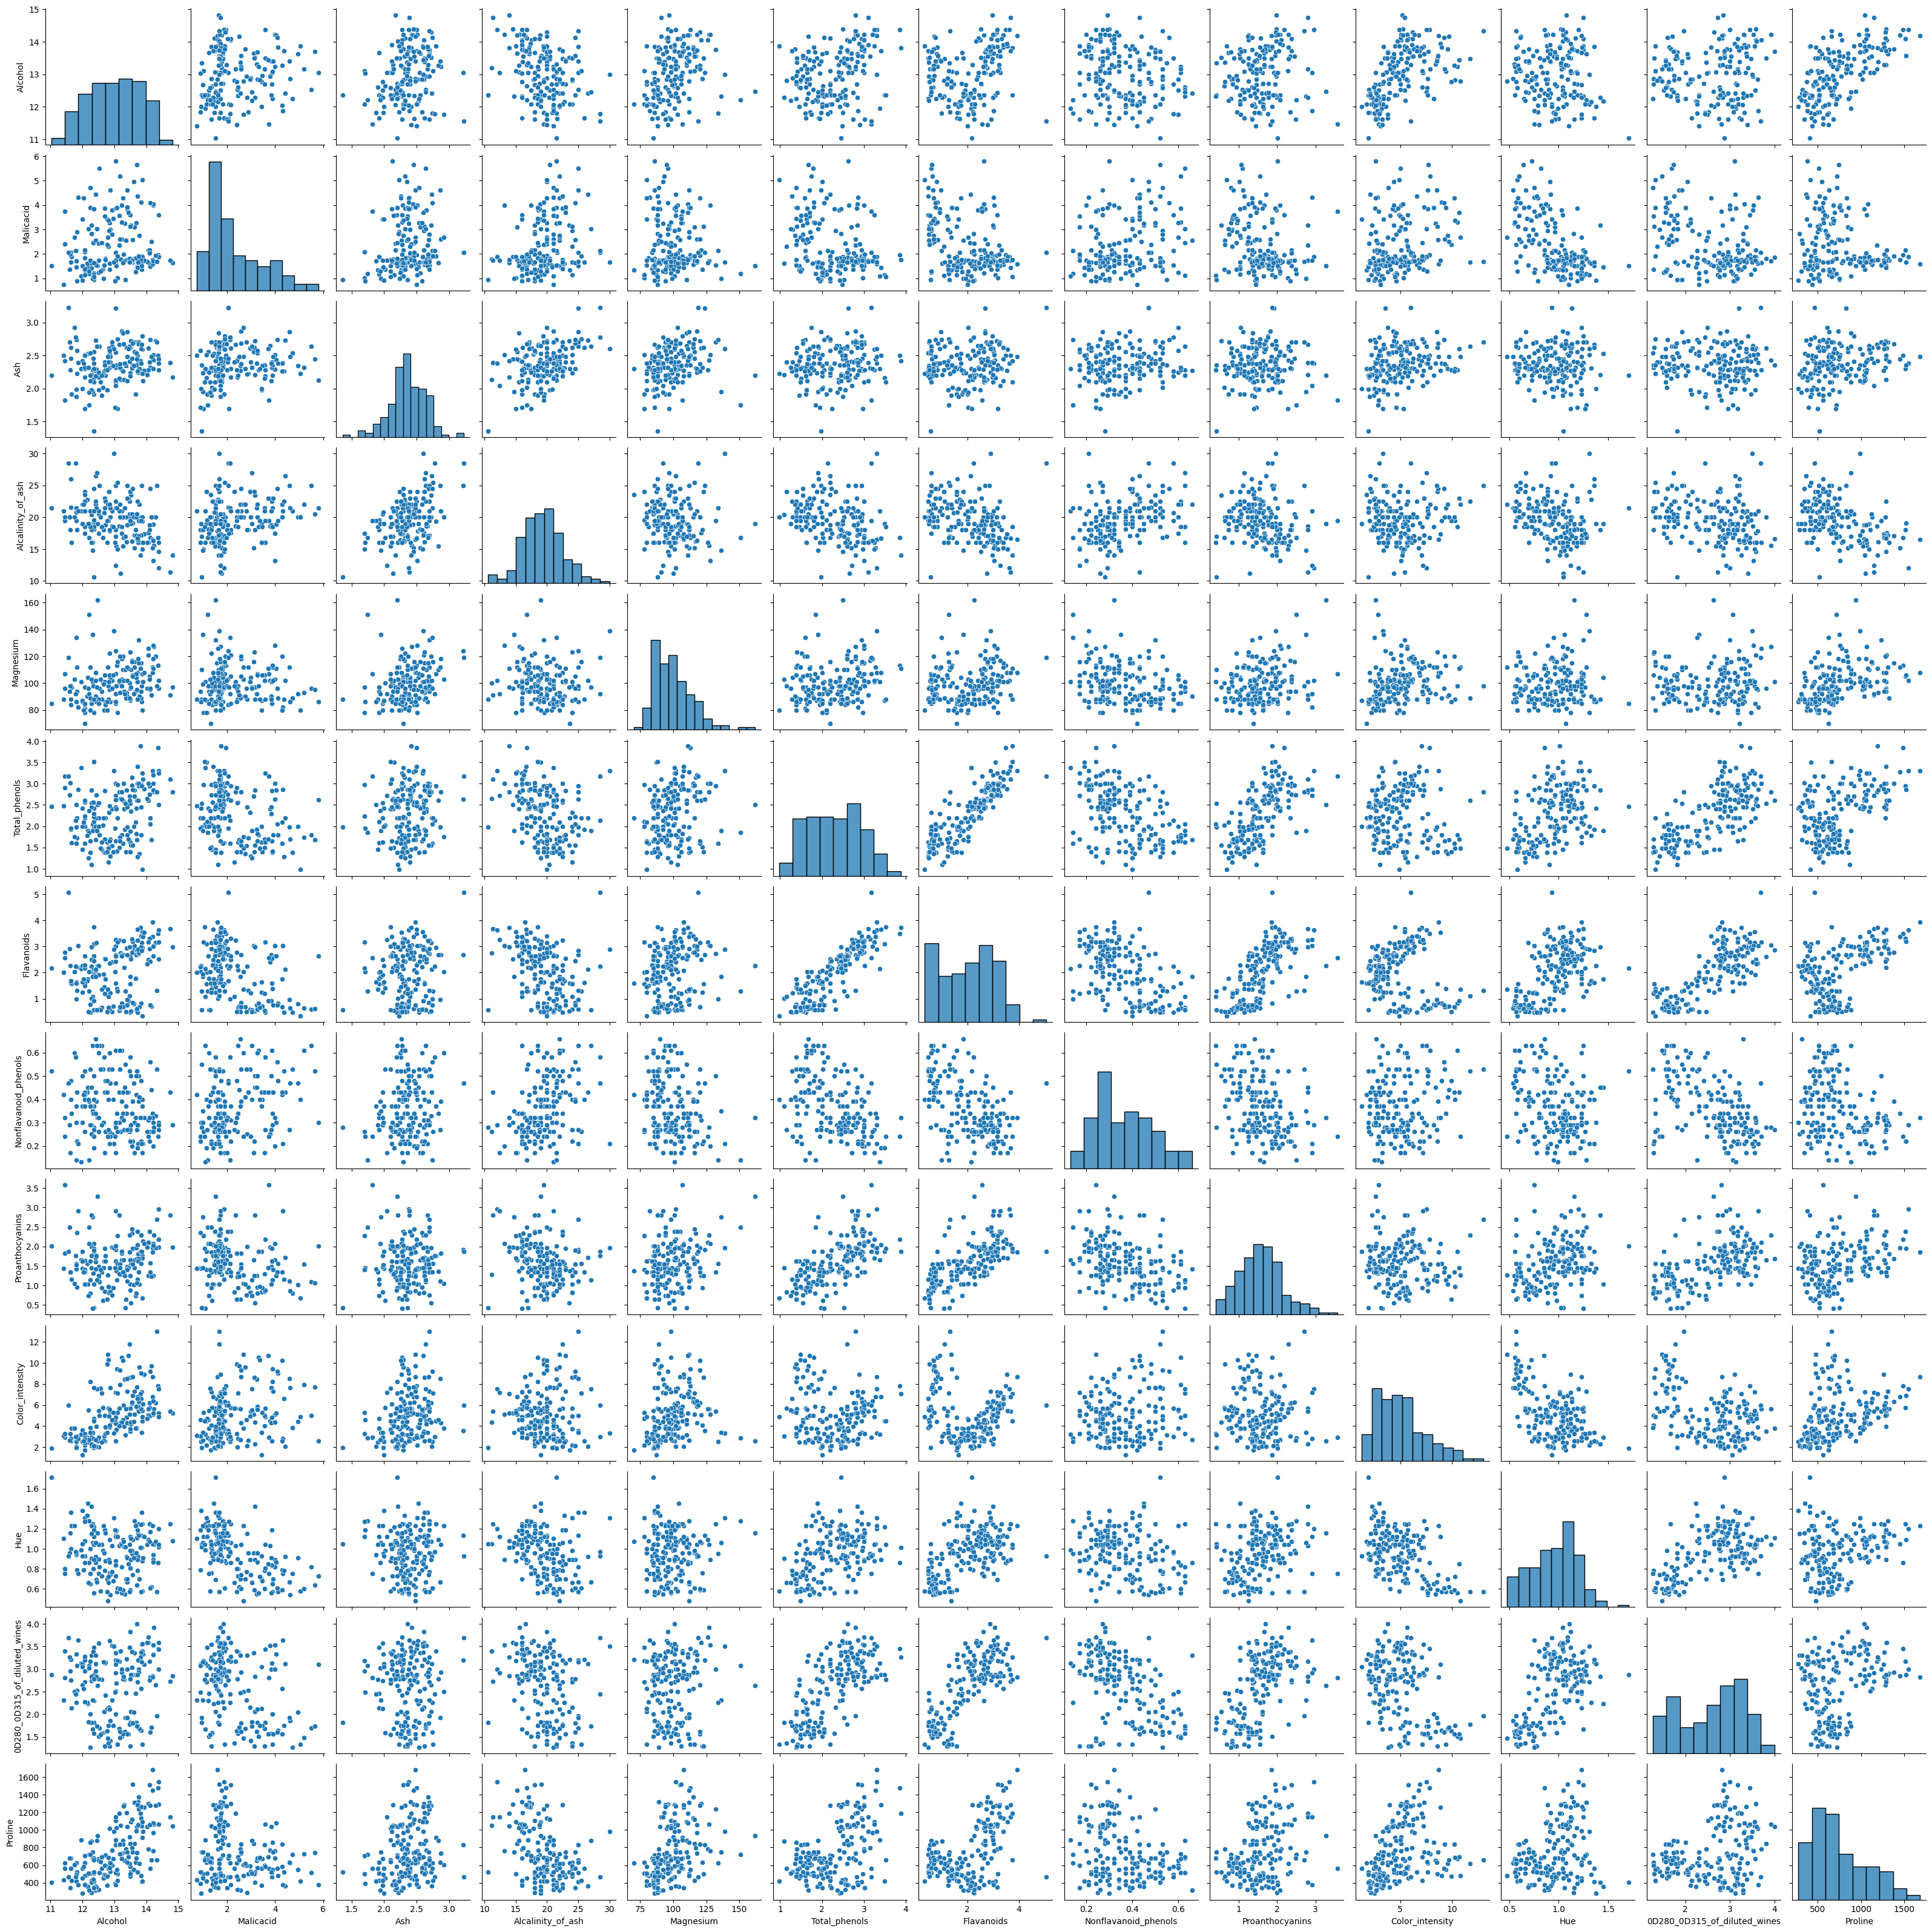

In [7]:
sns.pairplot(Wine)
plt.show()

In [8]:
alcohol = pd.cut(Wine['Alcohol'], [11, 13, 15])
Wine.pivot_table('Malicacid', [alcohol])

,Malicacid
Alcohol,
"(11, 13]",2.214070
"(13, 15]",2.450652


Text(0, 0.5, 'Amount')

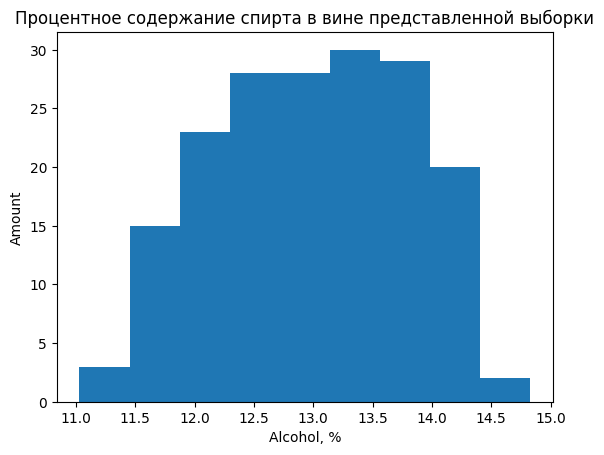

In [9]:
plt.hist(Wine['Alcohol'], bins='auto')
plt.title('Процентное содержание спирта в вине представленной выборки')
plt.xlabel('Alcohol, %')
plt.ylabel('Amount')


# 4.	Разбить данные на test и train. Предварительно убрав колонки с таргетом

In [10]:
from sklearn. model_selection import train_test_split
Wine_train, Wine_test, y_train, y_test = train_test_split(Wine, y, test_size= 0.2 , random_state= 4 )

# 5.	Обучить decision tree на 2х самых коррелирующих признаках и не коррелирующих признаках, используя gini. Посмотреть метрики(f1 score,accuracy,precision,recall), сделать выводы, построить ConfusionMatrix  

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn import metrics


In [70]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

clf = tree.DecisionTreeClassifier(max_depth=10)
clf = clf.fit(Wine_train, y_train)

prediction_clf_train = clf.predict(Wine_train)
score_train = accuracy_score(y_train, prediction_clf_train)

prediction_clf = clf.predict(Wine_test)
score = accuracy_score(y_test, prediction_clf)

print(f'Лучшие найденные параметры: {clf}')
print(f'Точность на тренировочных данных: {round(score_train*100, 2)}')
print(f'Точность на тестовых данных: {round(score*100, 2)}')

print('Метрики:')
print('Accuracy:', accuracy_score(y_test, prediction_clf)*100)
print('Precision:', precision_score(y_test, prediction_clf, average='weighted')*100)
print('Recall:', recall_score(y_test, prediction_clf, average='weighted')*100)
print('F1 Score:', f1_score(y_test, prediction_clf, average='weighted')*100)
print('Confusion Matrix:\n', confusion_matrix(y_test, prediction_clf))

Лучшие найденные параметры: DecisionTreeClassifier(max_depth=10)
Точность на тренировочных данных: 100.0
Точность на тестовых данных: 88.89
Метрики:
Accuracy: 88.88888888888889
Precision: 90.25252525252525
Recall: 88.88888888888889
F1 Score: 88.80837359098228
Confusion Matrix:
 [[10  0  0]
 [ 1 12  0]
 [ 0  3 10]]


Text(0.5, 23.52222222222222, 'Predicted label')

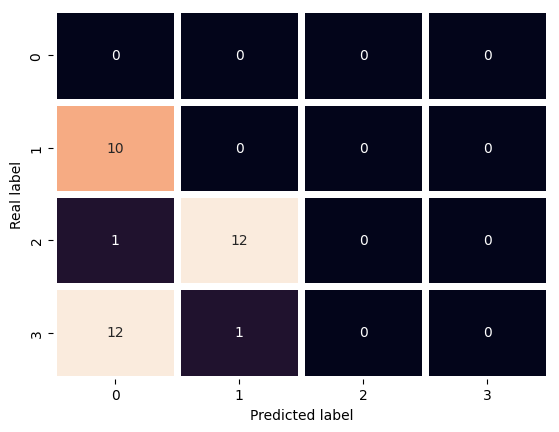

In [54]:
cfm = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(cfm, annot=True, linewidth=5, cbar=None)
plt.ylabel('Real label')
plt.xlabel('Predicted label')

In [18]:
Wine_selected_corr = Wine[['Total_phenols','Flavanoids']]

In [19]:
Wine_selected_corr.head()

,Total_phenols,Flavanoids
0,2.80,3.06
1,2.65,2.76
2,2.80,3.24
3,3.85,3.49
4,2.80,2.69


In [20]:
Wine_train_selected_corr, Wine_test_selected_corr, y_train, y_test = train_test_split(Wine_selected_corr, y, test_size= 0.2 , random_state= 4 )

In [73]:
clf = tree.DecisionTreeClassifier(max_depth=5)
clf = clf.fit(Wine_train_selected_corr, y_train)

prediction_clf_train = clf.predict(Wine_train_selected_corr)
score_train = accuracy_score(y_train, prediction_clf_train)

prediction_clf = clf.predict(Wine_test_selected_corr)
score = accuracy_score(y_test, prediction_clf)

print(f'Лучшие найденные параметры: {clf}')
print(f'Точность на тренировочных данных: {round(score_train*100, 2)}')
print(f'Точность на тестовых данных: {round(score*100, 2)}')


print('Метрики:')
print('Accuracy:', accuracy_score(y_test, prediction_clf)*100)
print('Precision:', precision_score(y_test, prediction_clf, average='weighted')*100)
print('Recall:', recall_score(y_test, prediction_clf, average='weighted')*100)
print('F1 Score:', f1_score(y_test, prediction_clf, average='weighted')*100)
print('Confusion Matrix:\n', confusion_matrix(y_test, prediction_clf))

Лучшие найденные параметры: DecisionTreeClassifier(max_depth=5)
Точность на тренировочных данных: 88.73
Точность на тестовых данных: 80.56
Метрики:
Accuracy: 80.55555555555556
Precision: 80.50505050505052
Recall: 80.55555555555556
F1 Score: 79.88267770876467
Confusion Matrix:
 [[ 9  1  0]
 [ 2  8  3]
 [ 0  1 12]]


In [22]:
Wine_selected_not_corr = Wine[['Ash','0D280_0D315_of_diluted_wines']]

In [23]:
Wine_selected_not_corr.head(5)

,Ash,0D280_0D315_of_diluted_wines
0,2.43,3.92
1,2.14,3.40
2,2.67,3.17
3,2.50,3.45
4,2.87,2.93


In [24]:
Wine_train_selected_not_corr, Wine_test_selected_not_corr = train_test_split(Wine_selected_not_corr, test_size= 0.2 , random_state= 4 )

In [72]:
clf = tree.DecisionTreeClassifier(max_depth=5)
clf = clf.fit(Wine_train_selected_not_corr, y_train)

prediction_clf_train = clf.predict(Wine_train_selected_not_corr)
score_train = accuracy_score(y_train, prediction_clf_train)

prediction_clf = clf.predict(Wine_test_selected_not_corr)
score = accuracy_score(y_test, prediction_clf)

print(f'Лучшие найденные параметры: {clf}')
print(f'Точность на тренировочных данных: {round(score_train*100, 2)}')
print(f'Точность на тестовых данных: {round(score*100, 2)}')


print('Метрики:')
print('Accuracy:', accuracy_score(y_test, prediction_clf)*100)
print('Precision:', precision_score(y_test, prediction_clf, average='weighted')*100)
print('Recall:', recall_score(y_test, prediction_clf, average='weighted')*100)
print('F1 Score:', f1_score(y_test, prediction_clf, average='weighted')*100)
print('Confusion Matrix:\n', confusion_matrix(y_test, prediction_clf))

Лучшие найденные параметры: DecisionTreeClassifier(max_depth=5)
Точность на тренировочных данных: 83.1
Точность на тестовых данных: 72.22
Метрики:
Accuracy: 72.22222222222221
Precision: 76.4520202020202
Recall: 72.22222222222221
F1 Score: 71.97779072779072
Confusion Matrix:
 [[10  0  0]
 [ 6  7  0]
 [ 0  4  9]]


# 6.	Обучить на выбор (SVM, XGboost,RandomForest), на всех признаках. Получить результат, отобразить метрики как в пункте 5, в случае обучения методов использующих деревья отразить важность признаков

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
Wine, y = make_classification(n_samples=1000, n_features=4,
    n_informative=2, n_redundant=0,
    random_state=0, shuffle=False)
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(Wine, y)
RandomForestClassifier()
print(clf.predict([[0, 0, 0, 0]]))

prediction_clf = clf.predict(Wine)
score = accuracy_score(y, prediction_clf)
print(f'Точность: {round(score*100, 2)}')
print('Метрики:')
print('Accuracy:', accuracy_score(y, prediction_clf)*100)
print('Precision:', precision_score(y, prediction_clf, average='weighted')*100)
print('Recall:', recall_score(y, prediction_clf, average='weighted')*100)
print('F1 Score:', f1_score(y,prediction_clf, average='weighted')*100)

[1]
Точность: 94.6
Метрики:
Accuracy: 94.6
Precision: 94.6883609157468
Recall: 94.6
F1 Score: 94.59833647394889
Confusion Matrix:
 [[466  38]
 [ 16 480]]


In [36]:
from sklearn.svm import SVC

svm = SVC()
svm.fit(Wine_train, y_train)
y_pred_svm = svm.predict(Wine_test)

print('SVM Metrics:')
print('Accuracy:', accuracy_score(y_test, y_pred_svm)*100)
print('Precision:', precision_score(y_test, y_pred_svm, average='weighted')*100)
print('Recall:', recall_score(y_test, y_pred_svm, average='weighted')*100)
print('F1 Score:', f1_score(y_test, y_pred_svm, average='weighted')*100)
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred_svm))

SVM Metrics:
Accuracy: 61.111111111111114
Precision: 40.20810107766629
Recall: 61.111111111111114
F1 Score: 48.22866344605475
Confusion Matrix:
 [[10  0  0]
 [ 1 12  0]
 [ 2 11  0]]


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# 7.	Построить график roc curve

In [49]:
y_prob = model_LR.predict_proba(Wine_test)[:, 1]
y_pred = np.where(y_prob > 0.5, 1, 0)
model_LR.score(Wine_test, y_pred)

0.0

In [45]:
from sklearn.metrics import roc_auc_score
clf = LogisticRegression(solver="liblinear", random_state=0).fit(Wine, y)
roc_auc_score(y, clf.predict_proba(Wine)[:, 1])


0.9767305107526881

In [50]:
fp, tp, thresh = metrics.roc_curve(y_test, y_prob)
roc_auc = metrics.auc(fp, tp)
roc_auc

ValueError: multiclass format is not supported